------------

> ‚ùó‚ùó‚ùó‚ö†Ô∏è  üí∏   DONT USE CPU‚ùó‚ùó‚ùó   
> **üß† ü§ë   USE ONLY GPU A100 (max GB used: RAM 72 - GPU 17 - DISC 50)**
------------

# Modelo de Detecci√≥n de Fraude utilizando Computer Vision

El ejercicio que se presenta a continuaci√≥n corresponde al proyecto final correspondiente al bootcamp de inteligencia artificial y por medio de √©l, se pretende mostrar todos los conocimientos adquiridos durante este bootcamp. Para ello, el ejercicio que se plantea es el de desarrollar un modelo que sea capaz de prevenir fraudes.

En la actualidad, ocurren muchos fraudes debido a la suplantaci√≥n de identidad de las personas. Gracias a la tecnolog√≠a, hoy en d√≠a es sencillo suplantar la identidad de una persona por medio de una imagen la cual parezca que es real pero en realidad no lo es. Es por eso que con el fin de ayuda a prevenir los fraudes, el ejercicio que se va a plantear es el de desarrolllar un modelo de DeepLearning el cual sea capaz de distinguir si una imagen es real o es sint√©tica.

Por ello, se va a utilizar el dataset existente de huggingface [JamieWithofs/Deepfake-and-real-images-4](https://huggingface.co/datasets/JamieWithofs/Deepfake-and-real-images-4) el cual posee varias imagenes reales y ficticias etiquetadas y se van a realizar los pasos necesarios para alcanzar el objetivo de desarrollar un modelo de computer vision capaz de detectar si una imagen es real o no. Para ello, los pasos que se van a realizar van a ser los siguientes:

- En primer lugar, revisi√≥n del dataset y reducci√≥n del mismo debido a falta de recursos computacionales.
- En segundo lugar, creaci√≥n de tensores con las im√°genes para entrenar el modelo y generaci√≥n de los vectores caracter√≠sticos de cada uno de ellos.
- Entrenamiento del modelo apoyandonos en un modelo base preentrenado: ResNet50.
- Optimizaci√≥n de hiperpar√°metros para el modelo elegido
- Despliegue del modelo final en la nube.

Este notebook se centra exclusivamente en los dos primeros pasos: la generaci√≥n de los tensores y la creaci√≥n de los vectores. El  motivo por el que se ha realizado el ejercicio en distintos notebooks es para tener una organizaci√≥n m√°s clara y eficiente. Asimismo, destacar que los notebooks est√°n dividio en subapartados para organizar de una forma m√°s clara todo el ejercicio. Adem√°s, en cada celda se explica que es lo que se pretende conseguir y se justifica todas las decisiones tomadas.

# Carga del dataset de Hugging Face

En primer lugar instalamos e importamos todas las librer√≠as necesarias para el ejercicio.

In [ ]:
!pip install -q datasets tensorflow gdown

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.8/547.8 kB 7.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39.9/39.9 MB 38.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 16.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64.9/64.9 kB 10.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 23.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 20.6 MB/s eta 0:00:00
ERROR: pip's dependency res

In [ ]:
# Instalamos las librer√≠as necesarias
!pip install --upgrade -q google-api-python-client google-auth-httplib2 google-auth-oauthlib

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.0/12.0 MB 35.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade -q pyarrow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import gdown
import tensorflow as tf
import numpy as np
import os
import google.auth
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from googleapiclient.http import MediaIoBaseDownload
import io
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

Por medio de la funci√≥n load_dataset cargamos el dataset.

In [ ]:
# Cargar el dataset
dataset = load_dataset('JamieWithofs/Deepfake-and-real-images-4')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/121159 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/35304 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/53184 [00:00<?, ? examples/s]

El dataset descargado est√° dividio a su vez en train, test y validaci√≥n. Comprobamos las dimensiones de cada uno.

In [ ]:
# Guardamos los datasets por separado
df_train = dataset['train']
df_validation = dataset['validation']
df_test = dataset['test']

# Observamos el tama√±o del dataset de train
print("Dimension del dataset de train:", df_train.shape)
print("Dimension del dataset de validaci√≥n:", df_validation.shape)
print("Dimension del dataset de test:", df_test.shape)

Dimension del dataset de train: (121159, 2)
Dimension del dataset de validaci√≥n: (53184, 2)
Dimension del dataset de test: (35304, 2)


Cada dataset est√° dividido en dos columnas: una que indica la imagen y la otra que especifica si es real o sint√©tica. Podemos apreciar como el n√∫mero de registros para cada dataset est√° descompensado: 54.56% de train, 23.95% de validaci√≥n y 15.89% de test. M√°s o menos la proporci√≥n entre los registros es aceptable, sin embargo el n√∫mero de registros que posee el dataset de train es demasiado elevada. Es importante considerar que cada registro en una imagen debe ser cargado y analizado para verificar si es real o no. Es por eso que debido a la falta de recursos computaciones, vamos a dividir los datasets en partes iguales para mantener la proporci√≥n entre ellos. Adem√°s, nos aseguraremos de que la proporci√≥n entre im√°genes reales y sint√©ticas se mantenga constante en cada uno de los conjuntos.

##Reducci√≥n del Tama√±o del Conjunto de Entrenamiento

Dado que el tama√±o del conjunto de entrenamiento es demasiado grande en comparaci√≥n con los recursos que disponemos con Google Colab, es necesario reducirlo. Para lograr esto, creamos una funci√≥n que divide cada dataset, asegurando que la proporci√≥n entre im√°genes reales y sint√©ticas se mantenga constante.

En un primer lugar, intentamos realizar el ejercicio dividiendo cada dataset a la mitad. Sin embargo, el coste computacional era tan elevado que no pudimos realizar el ejercicio. Es por eso que fuimos aumentando el divisor hasta alcanzar un n√∫mero que nos permit√≠a asumir el coste computacional. Finalmente, el n√∫mero resultante fue 8, y llegamos a esta conclusi√≥n mediante prueba y error, utilizando la funci√≥n que se muestra a continuaci√≥n.

In [ ]:
# Funci√≥n para reducir el dataset
def reduce_dataset(hf_dataset, dataset_name):
    total_size = len(hf_dataset)
    sample_size = total_size // 8

    # Calcular el paso para el muestreo sistem√°tico
    step = total_size // sample_size

    # Crear √≠ndices para el muestreo sistem√°tico
    indices = np.arange(0, total_size, step)[:sample_size]

    # Crear el dataset ligero utilizando los √≠ndices seleccionados
    dataset_reducido = hf_dataset.select(indices)

    # Contar y mostrar las etiquetas
    labels_series = pd.Series(dataset_reducido['label'])
    label_counts = labels_series.value_counts()

    print(f'Dataset {dataset_name} reducido:\n{label_counts}')

    return dataset_reducido

# Reducir los datasets
df_train = reduce_dataset(df_train,'train')
df_validation = reduce_dataset(df_validation,'validation')
df_test = reduce_dataset(df_test,'test')

# Observamos el tama√±o del dataset de train
print("Dimension del dataset de train:", df_train.shape)
print("Dimension del dataset de validaci√≥n:", df_validation.shape)
print("Dimension del dataset de test:", df_test.shape)



Dataset train reducido:
0    7572
1    7572
Name: count, dtype: int64
Dataset validation reducido:
1    3348
0    3300
Name: count, dtype: int64
Dataset test reducido:
1    2208
0    2205
Name: count, dtype: int64
Dimension del dataset de train: (15144, 2)
Dimension del dataset de validaci√≥n: (6648, 2)
Dimension del dataset de test: (4413, 2)


Tras dividir cada dataset entre 8 podemos comprobar como el n√∫mero de registros obviamente ha disminuido pero sin embargo la proporci√≥n entre im√°genes reales y sint√©ticas sigue siendo similar (50-50). Esto es importante porque, si solo se mantienen im√°genes de un tipo, el modelo puede tender a sesgarse. Sin embargo, al mantener la proporci√≥n equitativa entre los tipos de im√°genes, podemos mitigar este riesgo.

Como se ha comentado anteriormente, cada dataset est√° dividido a su vez en dos columnas: image y label. Image es la columna que contiene las im√°genes y label es la etiqueta que indica si la imagen es real o sint√©ticas. Dado que es necesario generar los tensores solo con las im√°genes, extraemos las im√°genes y etiquetas de cada dataset y los almacenamos por separado.

# Extracci√≥n de Im√°genes y Generaci√≥n de Tensores.

In [ ]:
# Extraer las im√°genes y etiquetas
images_train = df_train['image']
labels_train = df_train['label']

images_validation = df_validation['image']
labels_validation = df_validation['label']

images_test = df_test['image']
labels_test = df_test['label']

Ahora, por ejemplo, podemos verificar si la divisi√≥n se ha realizado correctamente.

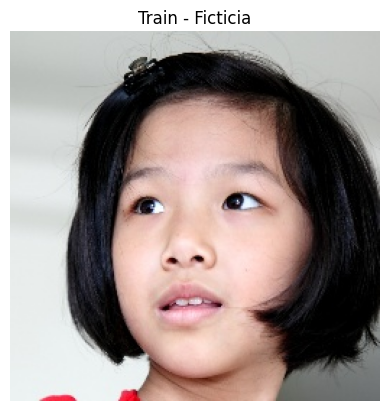

In [ ]:
# Funci√≥n para mostrar la imagen y la etiqueta
def muestra_imagen(images, labels, dataset_name):
    # Selecciona un √≠ndice aleatorio
    random_index = random.randint(0, len(images) - 1)

    # Extrae la imagen y la etiqueta correspondiente
    image = images[random_index]
    label = labels[random_index]

    # Muestra la imagen
    plt.imshow(image, cmap='gray')
    plt.title(f'{dataset_name} - {"Ficticia" if label else "No Ficticia"}')
    plt.axis('off')
    plt.show()

# Mostrar una imagen aleatoria del dataset de train
muestra_imagen(images_train, labels_train, 'Train')

# Mostrar una imagen aleatoria del dataset de validaci√≥n
muestra_imagen(images_validation, labels_validation, 'Validation')

# Mostrar una imagen aleatoria del dataset de test
muestra_imagen(images_test, labels_test, 'Test')

Una vez separadas las im√°genes y etiquetas por datasets, procedemos a generar los tensores. Una cosa importante a tener en cuenta es que, dado que utilizaremos el modelo ResNet50, es necesario reescalar las im√°genes a 224x224 p√≠xeles. Por ello, procedemos a reescalar las im√°genes y a centrarlas: para ellos les restamos la media y las dividimos por la desviaci√≥n est√°ndar de las im√°genes del dataset de train.

In [ ]:
# Especificamos las dimensiones de las im√°genes
w, h = 224,224

from PIL import Image

# Funci√≥n para reescalar las im√°genes
def resize_images(images_list, size=(224, 224)):
    resized_images = []
    for image in images_list:
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)
        resized_image = image.resize(size)
        resized_images.append(np.array(resized_image))
    return resized_images

# Redimensionar las im√°genes
images_train_resized = resize_images(images_train, size=(224, 224))
images_validation_resized = resize_images(images_validation, size=(224, 224))
images_test_resized = resize_images(images_test, size=(224, 224))

# Centramos los datos (le restamos la media y dividimos por la desviaci√≥n est√°ndar)
images_train_mean = np.mean(images_train_resized, axis=0)
images_train_std = np.std(images_train_resized, axis=0)

images_train  = (images_train_resized - images_train_mean) / images_train_std
images_validation  = (images_validation_resized - images_train_mean) / images_train_std
images_test  = (images_test_resized - images_train_mean) / images_train_std

Seguidamente, creamos una funci√≥n para convertir las im√°genes en arrays de NumPy. Para evitar quedarnos sin recursos computacionales, creamos los arrays por batches y guardamos los tensores generados.


In [ ]:
# Funci√≥n para convertir listas de im√°genes en arrays de NumPy por lotes
def convert_to_numpy_array(images_list, batch_size=100):
    n = len(images_list)
    num_batches = (n + batch_size - 1) // batch_size  # Calcular el n√∫mero de lotes
    numpy_array = np.zeros((n, w, h, 3), dtype=np.float32)  # Crear un array vac√≠o

    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, n)
        batch_images = images_list[start:end]
        numpy_array[start:end] = np.array(batch_images)

    return numpy_array


# Convertir listas a arrays de NumPy por lotes
np_images_train = convert_to_numpy_array(images_train, batch_size=32)
np_images_validation = convert_to_numpy_array(images_validation, batch_size=32)
np_images_test = convert_to_numpy_array(images_test, batch_size=32)


Adicionalmente, como puede apreciarse las etiquetas de train, validaci√≥n y test solamente tienen una dimensi√≥n. Esto es debido a que son vectores en donde cada posici√≥n hay un 1 o un 0, sea ficticia o no ficticia. El problema es que nuestro modelo va tener dos neuronas de salidas, una por cada posible soluci√≥n y por eso es necesario convertir los arrays de etiquetas en one_hot encoding para que luego el modelo pueda ser entrenado. Por ello, las transformamos.

In [ ]:
# Convertir las etiquetas a arrays de NumPy
np_labels_train = np.array(labels_train)
np_labels_validation = np.array(labels_validation)
np_labels_test = np.array(labels_test)

# Convertir etiquetas a formato one-hot
num_classes = 2
np_labels_train = to_categorical(np_labels_train, num_classes=num_classes)
np_labels_validation = to_categorical(np_labels_validation, num_classes=num_classes)
np_labels_test = to_categorical(np_labels_test, num_classes=num_classes)

# Comprobaci√≥n de las formas de los arrays
print("Dimensi√≥n tensor de train:", np_images_train.shape)
print("Dimensi√≥n tensor de validaci√≥n:", np_images_validation.shape)
print("Dimensi√≥n tensor de test:", np_images_test.shape)
print("Dimensi√≥n array de etiquetas de train:", np_labels_train.shape)
print("Dimensi√≥n array de etiquetas de validaci√≥n:", np_labels_validation.shape)
print("Dimensi√≥n array de etiquetas de test:", np_labels_test.shape)

# Guardamos los ficheros
np.save('np_images_train.npy', np_images_train)
np.save('np_images_validation.npy', np_images_validation)
np.save('np_images_test.npy', np_images_test)
np.save('np_labels_train.npy', np_labels_train)
np.save('np_labels_validation.npy', np_labels_validation)
np.save('np_labels_test.npy', np_labels_test)

Dimensi√≥n tensor de train: (15144, 224, 224, 3)
Dimensi√≥n tensor de validaci√≥n: (6648, 224, 224, 3)
Dimensi√≥n tensor de test: (4413, 224, 224, 3)
Dimensi√≥n array de etiquetas de train: (15144, 2)
Dimensi√≥n array de etiquetas de validaci√≥n: (6648, 2)
Dimensi√≥n array de etiquetas de test: (4413, 2)


Como resultado de ejecutar esta celda, obtenemos tres tensores con las im√°genes en tama√±o (x, 224, 224, 3), donde "x" es el n√∫mero de registros de cada dataset. Adem√°s, obtenemos tres arrays con una columna que indica si las im√°genes son ficticias o no. Dado que generar estos tensores supone un coste computacional significativo, para evitar ejecutar este proceso repetidamente cada vez que se desee realizar el ejercicio, guardamos los tensores en archivos .npy en Google Drive.


En primer lugar, definimos unos nombres espec√≠ficos para cada fichero.

In [ ]:
# Definir los nombres de los archivos de los arrays de NumPy
numpy_filenames = [
    'np_images_train.npy',
    'np_images_validation.npy',
    'np_images_test.npy',
    'np_labels_train.npy',
    'np_labels_validation.npy',
    'np_labels_test.npy'
]

A continuaci√≥n, creamos una funci√≥n para subir los nuevos archivos guardados en local a la carpeta especificada en Google Drive. En este caso, utilizaremos una carpeta espec√≠fica creada para realizar el ejercicio.

In [ ]:
# Autenticamos el usuario en Google Colab
auth.authenticate_user()

# Obtener credenciales del entorno
creds, _ = google.auth.default()

# Crear el servicio de Google Drive
drive_service = build('drive', 'v3', credentials=creds)

# Especificar el ID de la carpeta en Google Drive donde se guardar√°n los archivos
folder_id = '1SpbMa6N6PleWgHWE5Gr8bgzDfK8nAN-0'

# Funci√≥n para subir un archivo a Google Drive
def upload_to_drive(file_path, folder_id):
    # Metadata del archivo a subir
    file_metadata = {
        'name': os.path.basename(file_path),  # Nombre del archivo en Google Drive
        'parents': [folder_id]  # ID de la carpeta donde se guardar√° el archivo
    }
    # Crear el objeto de subida de medios
    media = MediaFileUpload(file_path, resumable=True)
    # Subir el archivo
    uploaded_file = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()
    # Devolver el ID del archivo subido
    return uploaded_file.get('id')

Por √∫ltimo, subimos los ficheros.

In [ ]:
# Subimos los archivos de los arrays de NumPy
for filename in numpy_filenames:
    file_id = upload_to_drive(filename, folder_id)
    print(f"{filename} guardado en: https://drive.google.com/file/d/{file_id}")

np_images_train.npy guardado en: https://drive.google.com/file/d/14xZmqnC3Wu8xLRiiO4r3cJN73g3ANAzc
np_images_validation.npy guardado en: https://drive.google.com/file/d/1LorGEhjWuKWSmKfeJL0IT07kh3bnSgag
np_images_test.npy guardado en: https://drive.google.com/file/d/1ProIeybegdJLv9vsX1-_x5LPU1yw0td9
np_labels_train.npy guardado en: https://drive.google.com/file/d/15m47zIbQpNW-B11yYMwRcJM32H73-Q1k
np_labels_validation.npy guardado en: https://drive.google.com/file/d/19NLrNs8DeyjnlZMG8SnQ9Jrpf1LakdMv
np_labels_test.npy guardado en: https://drive.google.com/file/d/1tw6IMYzHn5ZRHVuFRfmMiHtQ6a5UzyOb


# Generaci√≥n de Vectores Caracter√≠sticos

Entrenar un modelo de Computer Vision supone un coste computacional elevado dado que el modelo tiene que procesar im√°genes. Las im√°genes son registros m√°s complejos de analizar en comparaci√≥n con los registros tabulares. Debido a esta complejidad, vamos a generar vectores caracter√≠sticos para cada dataset de im√°genes, con el fin de reducir el coste computacional.

In [ ]:
#Creo una funci√≥n para extraer caracter√≠sticas de las im√°genes.
def extract_features(images):
    # Cargo el modelo ResNet50 preentrenado sin la capa de clasificaci√≥n
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

    # A√±ado la capa de Flatten a la salida del modelo
    flatten_layer = Flatten()(base_model.output)
    model = Model(inputs=base_model.input, outputs=flatten_layer)

    # Nos aseguramos que la matriz no sea de solo lectura
    images_copy = np.array(images, copy=True)

    # Obtengo las caracter√≠sticas de las im√°genes
    features = model.predict(preprocess_input(images_copy))

    return features


# Extraigo caracter√≠sticas para cada conjunto de im√°genes.
images_train_features = extract_features(np_images_train)
images_test_features = extract_features(np_images_test)
images_validation_features = extract_features(np_images_validation)

# Compruebo sus dimensiones
print("Dimensiones de caracter√≠sticas del conjunto de train:", images_train_features.shape)
print("Dimensiones de caracter√≠sticas del conjunto de test:", images_test_features.shape)
print("Dimensiones de caracter√≠sticas del conjunto de validaci√≥n:", images_validation_features.shape)


7/7 [==============================] - 3s 306ms/step
Dimensiones de caracter√≠sticas del conjunto de train: (473, 2048)
Dimensiones de caracter√≠sticas del conjunto de test: (137, 2048)
Dimensiones de caracter√≠sticas del conjunto de validaci√≥n: (207, 2048)


Del mismo modo que hemos hecho antes, guardamos los vectores caracter√≠siticos en el drive.

In [ ]:
# Guardamos los ficheros
np.save('images_train_features.npy', images_train_features)
np.save('images_test_features.npy', images_test_features)
np.save('images_validation_features.npy', images_validation_features)

In [ ]:
# Definir los nombres de los archivos de los arrays de NumPy
numpy_filenames = [
    'images_train_features.npy',
    'images_test_features.npy',
    'images_validation_features.npy'
]

In [ ]:
# Autenticamos el usuario en Google Colab
auth.authenticate_user()

# Obtener credenciales del entorno
creds, _ = google.auth.default()

# Crear el servicio de Google Drive
drive_service = build('drive', 'v3', credentials=creds)

# Especificar el ID de la carpeta en Google Drive donde se guardar√°n los archivos
folder_id = '1SpbMa6N6PleWgHWE5Gr8bgzDfK8nAN-0'

# Funci√≥n para subir un archivo a Google Drive
def upload_to_drive(file_path, folder_id):
    # Metadata del archivo a subir
    file_metadata = {
        'name': os.path.basename(file_path),  # Nombre del archivo en Google Drive
        'parents': [folder_id]  # ID de la carpeta donde se guardar√° el archivo
    }
    # Crear el objeto de subida de medios
    media = MediaFileUpload(file_path, resumable=True)
    # Subir el archivo
    uploaded_file = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()
    # Devolver el ID del archivo subido
    return uploaded_file.get('id')

In [ ]:
# Subimos los archivos de los arrays de NumPy
for filename in numpy_filenames:
    file_id = upload_to_drive(filename, folder_id)
    print(f"{filename} guardado en: https://drive.google.com/file/d/{file_id}")

images_train_features.npy guardado en: https://drive.google.com/file/d/15JiasfC67ddmKtX3zM5yTFJTRPWHJaWK
images_test_features.npy guardado en: https://drive.google.com/file/d/1RYewhRpPV0xpRxQsvMMTX2PMiVhM2bCh
images_validation_features.npy guardado en: https://drive.google.com/file/d/1ZOnesZpLaQTgEPEfp3yGMh5BgwH0N-97


Una vez que los vectores han sido generados y guardados en la carpeta de Google Drive, damos por concluido este notebook. A continuaci√≥n, procederemos a entrenar el modelo y ajustar sus hiperpar√°metros utilizando los mismos.